<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_Health_and_Medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install missingpy import_ipynb

In [20]:
# utils
import os, sys, warnings, itertools
import import_ipynb
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib
# colab
from google.colab import drive
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.compose import (ColumnTransformer, make_column_transformer)
from sklearn.pipeline import (Pipeline, make_pipeline)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import MDS
# vis
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%matplotlib inline

In [23]:
working_path = os.path.abspath(os.path.join("/content/drive/MyDrive/Jupyter Notebooks/"))

In [24]:
if working_path not in sys.path:
    sys.path.append(working_path)

In [25]:
os.chdir(working_path)

In [26]:
from MachineLearningUtils import *

importing Jupyter notebook from MachineLearningUtils.ipynb


In [27]:
data_dir = "./Inputs"
csv_path = os.path.join(data_dir, "support2.csv")
data = pd.read_csv(csv_path)

In [28]:
reduce_memory_usage(df=data, category=True)

Memory usage of dataframe is 3.334473 MB!
Memory usage after optimization is 0.774438 MB!
Decreased by 76.8%


In [29]:
summarize_columns(data)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,row_id,int16,0,0.0,9105,1,2,3
1,age,float16,0,0.0,1778,62.84375,60.34375,52.75
2,death,int8,0,0.0,2,0,1,1
3,sex,category,0,0.0,2,male,female,female
4,hospdead,int8,0,0.0,2,0,1,0
5,slos,int16,0,0.0,167,5,4,17
6,d_time,int16,0,0.0,1724,2029,4,47
7,dzgroup,category,0,0.0,8,Lung Cancer,Cirrhosis,Cirrhosis
8,dzclass,category,0,0.0,4,Cancer,COPD/CHF/Cirrhosis,COPD/CHF/Cirrhosis
9,num_co,int8,0,0.0,10,0,2,2


In [30]:
data.drop(["row_id"], axis=1, inplace=True)
display_df(data)

Dataframe:  
num_rows = 9,105 
num_cols = 47


,age,death,sex,hospdead,slos,d_time,dzgroup,dzclass,num_co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,62.84375,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.200195,141.0,7.460938,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,60.34375,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,52.75000,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.460938,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,42.37500,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799805,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,79.87500,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799805,143.0,7.511719,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9105 non-null   float16 
 1   death     9105 non-null   int8    
 2   sex       9105 non-null   category
 3   hospdead  9105 non-null   int8    
 4   slos      9105 non-null   int16   
 5   d_time    9105 non-null   int16   
 6   dzgroup   9105 non-null   category
 7   dzclass   9105 non-null   category
 8   num_co    9105 non-null   int8    
 9   edu       7471 non-null   float16 
 10  income    6123 non-null   category
 11  scoma     9104 non-null   float16 
 12  charges   8933 non-null   float32 
 13  totcst    8217 non-null   float32 
 14  totmcst   5630 non-null   float32 
 15  avtisst   9023 non-null   float16 
 16  race      9063 non-null   category
 17  sps       9104 non-null   float16 
 18  aps       9104 non-null   float16 
 19  surv2m    9104 non-null   float16 
 20  su

In [31]:
int_columns = data.select_dtypes(include=['int8', 'int16']).columns.tolist()
int_cts_columns = data.select_dtypes(include=['int16']).columns.tolist()
int_cat_columns = data.select_dtypes(include=['int8']).columns.tolist()

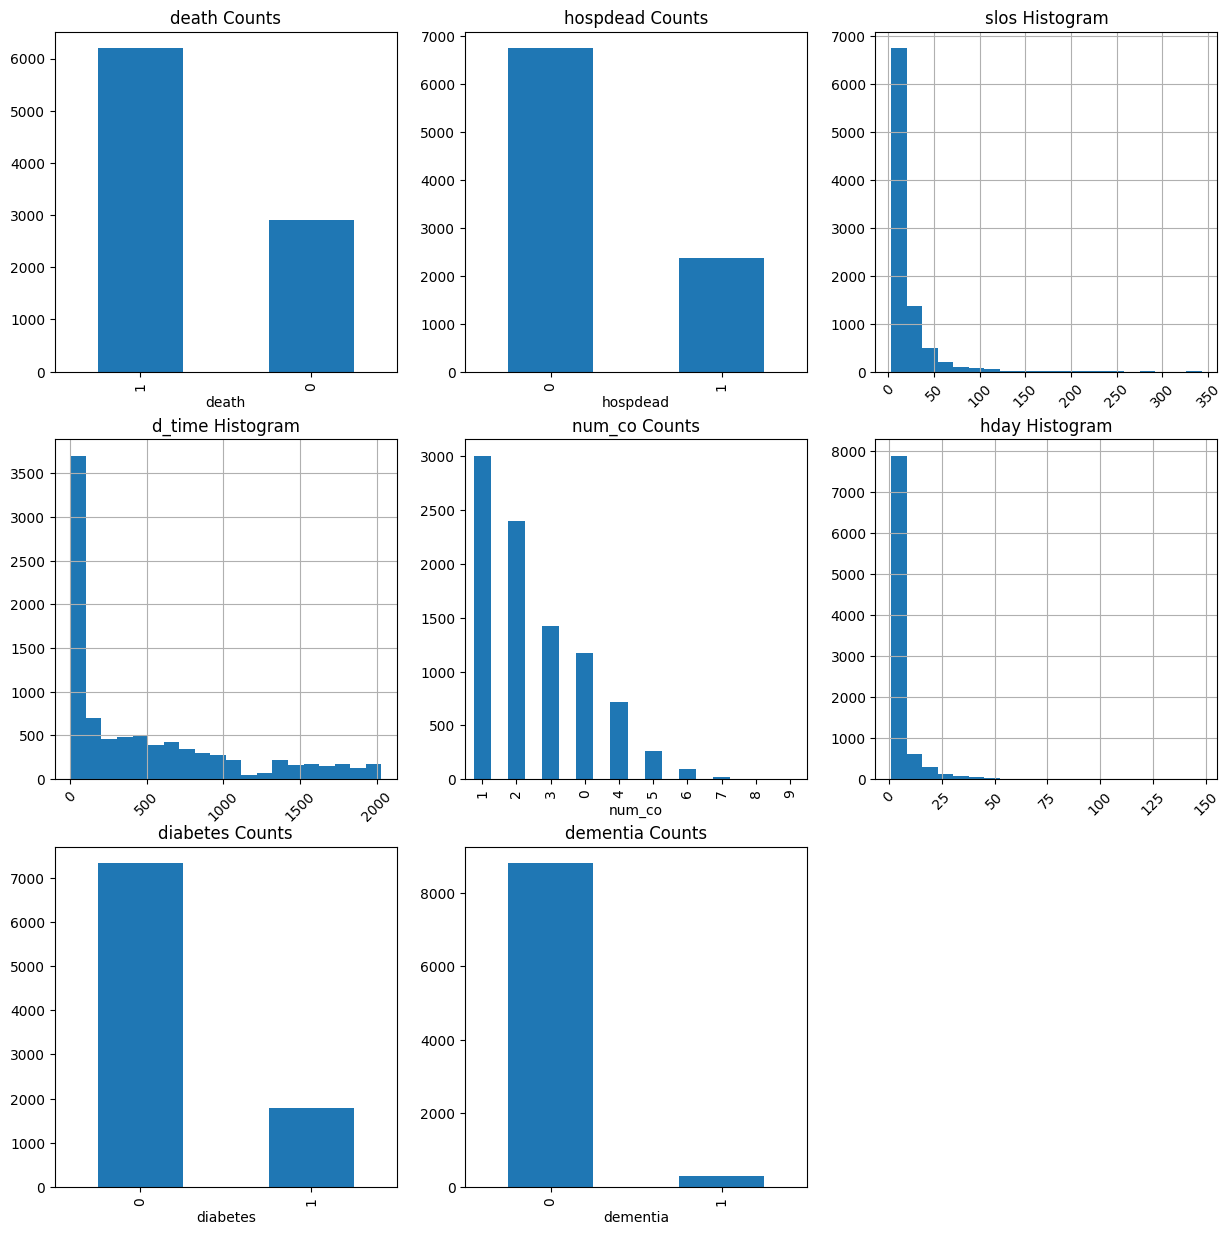

In [32]:
plot_varibles(df=data, vars_to_plot=int_columns, cts_vars=int_cts_columns,
              num_cols=3, hist_num_bins=20)

In [33]:
cols = list(data.columns)
categorical_features = data.select_dtypes(include='category').columns.tolist()
numerical_features = list(set(cols) - set(categorical_features) - set(int_columns))

<Axes: xlabel='Num_missed_values'>

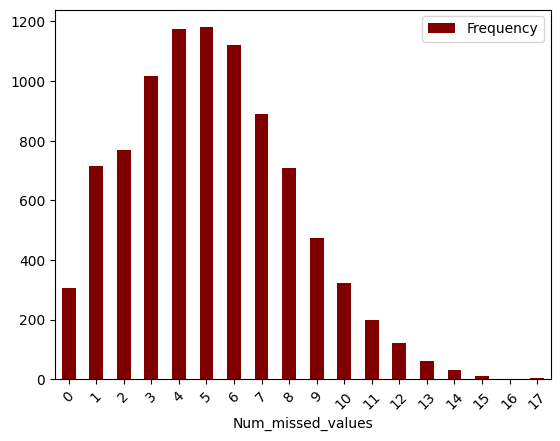

In [34]:
def count_rows_with_missing_values(dataframe):
    missing_values_per_row = data.isnull().sum(axis=1)
    _bins = np.arange(int(min(missing_values_per_row)), int(max(missing_values_per_row)) + 1)
    hist_values, bins = np.histogram(missing_values_per_row, bins=_bins)
    bins_percent = [_ for _ in bins]
    hist_df = pd.DataFrame({'Num_missed_values': bins_percent[:-1], 'Frequency': hist_values})
    return hist_df
result = count_rows_with_missing_values(data)
result.plot.bar(x='Num_missed_values', y='Frequency', rot=45, width=0.5, color='maroon')

In [35]:
# num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
#                                ("attribs_embedder", AppendRatioVariables(hash_indexes)),
#                                ("std_scaler", StandardScaler())
#                               ]
#                        )


num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                               ("std_scaler", StandardScaler())
                              ]
                       )
cat_pipeline = Pipeline(steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")),
                               ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse=False))
                              ]
                       )

int_pipeline = Pipeline(steps=[("int_imputer", SimpleImputer(strategy="most_frequent"))]
                       )

data_processor_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features),
                                             ("int_cts", num_pipeline, int_cts_columns),
                                             ("int_cat", num_pipeline, int_columns),
                                             ("cat", cat_pipeline, categorical_features)
                                            ]
                                           )
_df = data_processor_pipeline.fit_transform(data)
attribs = list(data_processor_pipeline.get_feature_names_out())
df = pd.DataFrame(_df, columns=attribs)
summarize_columns(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,num__totmcst,float64,0,0.0,5517,-0.274810,-0.274810,-0.274810
1,num__surv2m,float64,0,0.0,949,-1.502889,-2.558454,0.625159
2,num__aps,float64,0,0.0,125,-0.884225,1.829111,0.371949
3,num__surv6m,float64,0,0.0,936,-1.907166,-2.053178,0.572157
4,num__bun,float64,0,0.0,159,-0.245120,-0.245120,-0.245120
...,...,...,...,...,...,...,...,...
71,cat__sfdm2_<2 mo. follow-up,float64,0,0.0,2,1.000000,1.000000,1.000000
72,cat__sfdm2_Coma or Intub,float64,0,0.0,2,0.000000,0.000000,0.000000
73,cat__sfdm2_SIP>=30,float64,0,0.0,2,0.000000,0.000000,0.000000
74,cat__sfdm2_adl>=4 (>=5 if sur),float64,0,0.0,2,0.000000,0.000000,0.000000


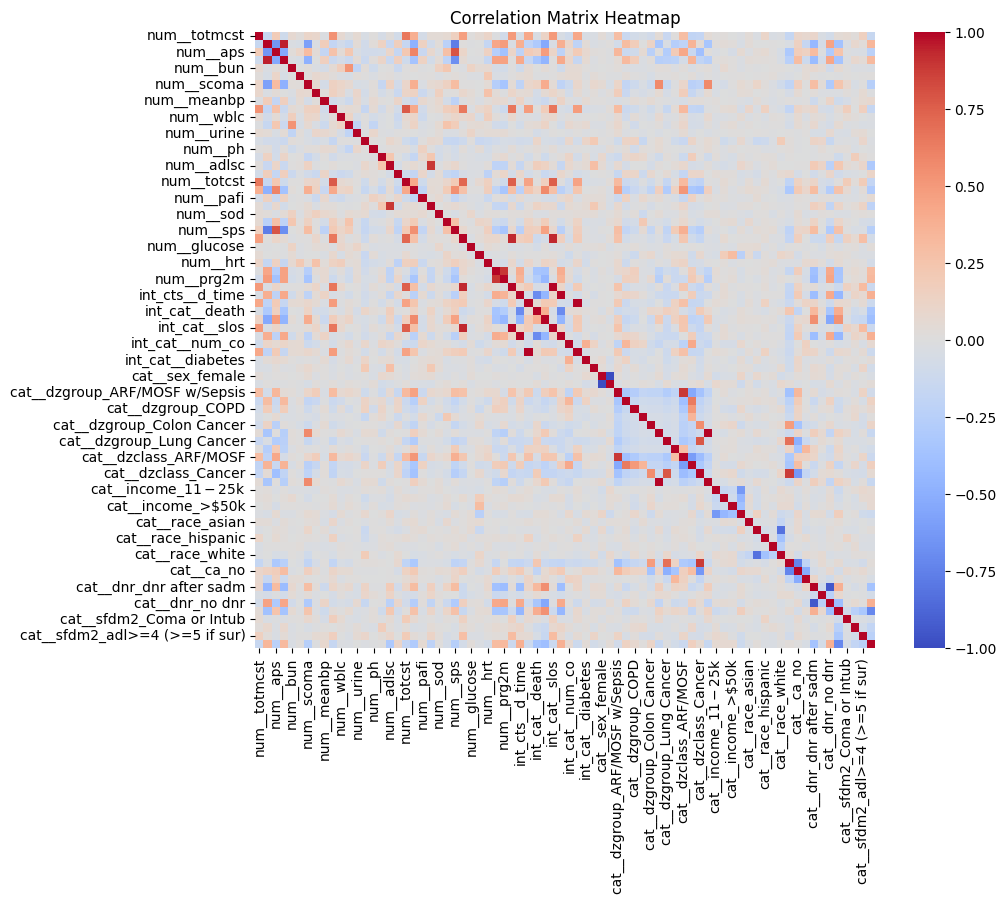

In [36]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
sample_train_df = train_df.sample(frac=0.2)
corr_matrix = sample_train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: >

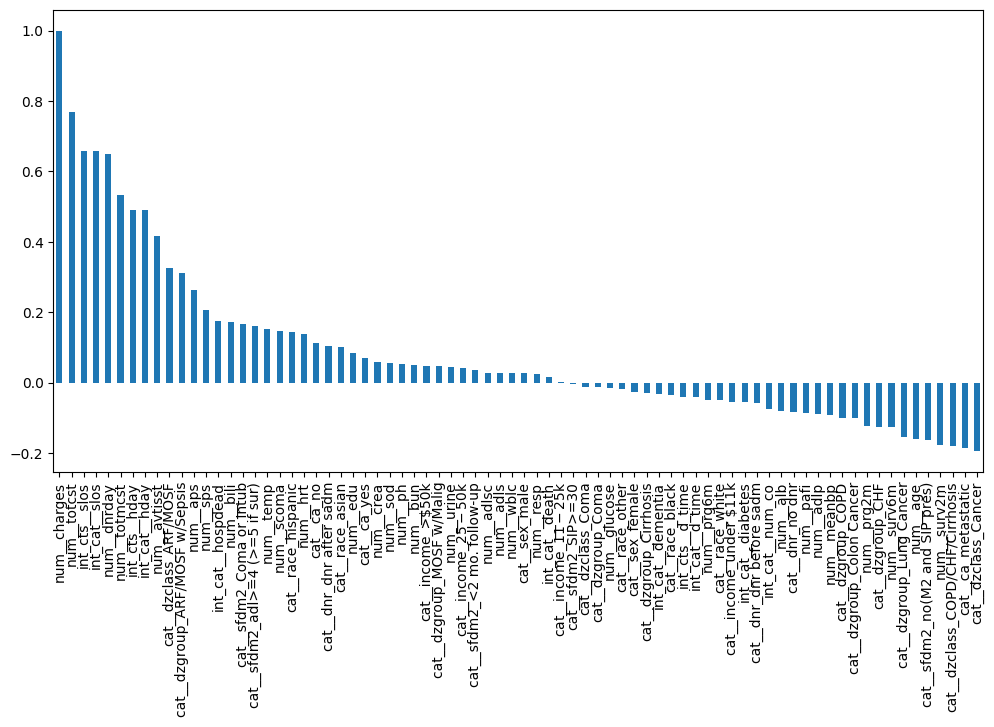

In [41]:
corr_matrix["num__charges"].sort_values(ascending=False)
corr_matrix["num__charges"].sort_values(ascending=False).plot.bar(figsize=(12,6))